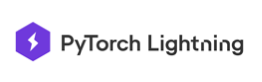

# The Boring Model
Replicate a bug you experience, using this model.

[Remember! we're always available for support on Slack](https://join.slack.com/t/pytorch-lightning/shared_invite/zt-f6bl2l0l-JYMK3tbAgAmGRrlNr00f1A)

---
## Setup env

In [1]:
%%capture
! pip install pytorch-lightning --upgrade

---
## Deps

In [2]:
import os

import torch
from torch.utils.data import DataLoader, Dataset

from pytorch_lightning import LightningModule, Trainer

---
## Data
Random data is best for debugging. If you needs special tensor shapes or batch compositions or dataloaders, modify as needed

In [3]:
class RandomDataset(Dataset):
    def __init__(self, size, num_samples):
        self.len = num_samples
        self.data = torch.randn(num_samples, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len


In [4]:
num_samples = 10000

In [5]:
class BoringModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(32, 2)

    def forward(self, x):
        return self.layer(x)

    def training_step(self, batch, batch_idx):
        loss = self(batch).sum()
        self.log("train_loss", loss)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        loss = self(batch).sum()
        self.log("valid_loss", loss)

    def test_step(self, batch, batch_idx):
        loss = self(batch).sum()
        self.log("test_loss", loss)

    def configure_optimizers(self):
        return torch.optim.SGD(self.layer.parameters(), lr=0.1)

---
## Define the test
NOTE: in colab, set progress_bar_refresh_rate high or the screen will freeze because of the rapid tqdm update speed.

In [6]:
def run():
    train_data = DataLoader(RandomDataset(32, 64), batch_size=2)
    val_data = DataLoader(RandomDataset(32, 64), batch_size=2)
    test_data = DataLoader(RandomDataset(32, 64), batch_size=2)

    model = BoringModel()
    trainer = Trainer(
        default_root_dir=os.getcwd(),
        limit_train_batches=1,
        limit_val_batches=1,
        num_sanity_val_steps=0,
        max_epochs=1,
        enable_model_summary=False,
    )
    trainer.fit(model, train_dataloaders=train_data, val_dataloaders=val_data)
    trainer.test(model, dataloaders=test_data)

---
## Run Test

In [7]:
run()

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1567: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:395: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': -1.676544427871704}
--------------------------------------------------------------------------------


---
## Environment
Run this to get the environment details

In [8]:
%%capture
! wget https://raw.githubusercontent.com/PyTorchLightning/pytorch-lightning/master/requirements/collect_env_details.py

In [9]:
! python collect_env_details.py

* CUDA:
	- GPU:
		- Tesla K80
	- available:         True
	- version:           11.1
* Packages:
	- numpy:             1.19.5
	- pyTorch_debug:     False
	- pyTorch_version:   1.10.0+cu111
	- pytorch-lightning: 1.5.1
	- tqdm:              4.62.3
* System:
	- OS:                Linux
	- architecture:
		- 64bit
		- 
	- processor:         x86_64
	- python:            3.7.12
	- version:           #1 SMP Sat Jun 5 09:50:34 PDT 2021
